## 1. Welcome!
<p><img src="https://images.squarespace-cdn.com/content/v1/5bfff88170e802806d993220/1543573642944-GO0U893I5N6JJX9T12IS/the-office-season-1-cast-nbc.jpg" alt="Markdown">.</p>
<p><strong>The Office!</strong> What started as a British mockumentary series about office culture in 2001 has since spawned ten other variants across the world, including an Israeli version (2010-13), a Hindi version (2019-), and even a French Canadian variant (2006-2007). Of all these iterations (including the original), the American series has been the longest-running, spanning 201 episodes over nine seasons.</p>
<p>In this notebook, we will take a look at a dataset of The Office episodes, and try to understand how the popularity and quality of the series varied over time. To do so, we will use the following dataset: <code>datasets/office_episodes.csv</code>, which was downloaded from Kaggle <a href="https://www.kaggle.com/nehaprabhavalkar/the-office-dataset">here</a>.</p>
<p>This dataset contains information on a variety of characteristics of each episode. In detail, these are:
<br></p>
<div style="background-color: #efebe4; color: #05192d; text-align:left; vertical-align: middle; padding: 15px 25px 15px 25px; line-height: 1.6;">
    <div style="font-size:20px"><b>datasets/office_episodes.csv</b></div>
<ul>
    <li><b>episode_number:</b> Canonical episode number.</li>
    <li><b>season:</b> Season in which the episode appeared.</li>
    <li><b>episode_title:</b> Title of the episode.</li>
    <li><b>description:</b> Description of the episode.</li>
    <li><b>ratings:</b> Average IMDB rating.</li>
    <li><b>votes:</b> Number of votes.</li>
    <li><b>viewership_mil:</b> Number of US viewers in millions.</li>
    <li><b>duration:</b> Duration in number of minutes.</li>
    <li><b>release_date:</b> Airdate.</li>
    <li><b>guest_stars:</b> Guest stars in the episode (if any).</li>
    <li><b>director:</b> Director of the episode.</li>
    <li><b>writers:</b> Writers of the episode.</li>
    <li><b>has_guests:</b> True/False column for whether the episode contained guest stars.</li>
    <li><b>scaled_ratings:</b> The ratings scaled from 0 (worst-reviewed) to 1 (best-reviewed).</li>
</ul>
    </div>

In [199]:
# Read in the CSV as a DataFrame
import pandas as pd
office_episodes = pd.read_csv("datasets/office_episodes.csv")

# Print the first ten rows of the DataFrame
office_episodes[:10]

,episode_number,season,episode_title,description,ratings,votes,viewership_mil,duration,release_date,guest_stars,director,writers,has_guests,scaled_ratings
0,0,1,Pilot,The premiere episode introduces the boss and s...,7.5,4936,11.20,23,2005-03-24,NaN,Ken Kwapis,Ricky Gervais |Stephen Merchant and Greg Daniels,False,0.28125
1,1,1,Diversity Day,Michael's off color remark puts a sensitivity ...,8.3,4801,6.00,23,2005-03-29,NaN,Ken Kwapis,B. J. Novak,False,0.53125
2,2,1,Health Care,Michael leaves Dwight in charge of picking the...,7.8,4024,5.80,22,2005-04-05,NaN,Ken Whittingham,Paul Lieberstein,False,0.37500
3,3,1,The Alliance,"Just for a laugh, Jim agrees to an alliance wi...",8.1,3915,5.40,23,2005-04-12,NaN,Bryan Gordon,Michael Schur,False,0.46875
4,4,1,Basketball,Michael and his staff challenge the warehouse ...,8.4,4294,5.00,23,2005-04-19,NaN,Greg Daniels,Greg Daniels,False,0.56250
5,5,1,Hot Girl,Michael is just one of the many male staff who...,7.7,3854,4.80,23,2005-04-26,Amy Adams,Amy Heckerling,Mindy Kaling,True,0.34375
6,6,2,The Dundies,"Very much unlike his staff, an overeager Micha...",8.7,4315,9.00,21,2005-09-20,NaN,Greg Daniels,Mindy Kaling,False,0.65625
7,7,2,Sexual Harassment,The office reviews its sexual harassment polic...,8.2,3665,7.13,22,2005-09-27,NaN,Ken Kwapis,B. J. Novak,False,0.50000
8,8,2,Office Olympics,"Ready to finalize his deal for a new condo, Mi...",8.4,3665,8.30,22,2005-10-04,Nancy Carell,Paul Feig,Michael Schur,True,0.56250
9,9,2,The Fire,A fire in the kitchen relegates the staff to t...,8.4,3607,7.60,22,2005-10-11,Amy Adams,Ken Kwapis,B. J. Novak,True,0.56250


In [200]:
# Create a color_scheme list
colors = []

# Iterate over rows of office_episodes to input color name to the colors list
for lab, row in office_episodes.iterrows():
    if row['scaled_ratings'] < 0.25:
        colors.append("red")
    elif 0.25 <= row['scaled_ratings'] < 0.50:
        colors.append("orange")
    elif 0.50 <= row['scaled_ratings'] < 0.75:
        colors.append("lightgreen")
    else:
        colors.append("darkgreen")

# Inspect the first 10 values in the list      
colors[:10]

['orange',
 'lightgreen',
 'orange',
 'orange',
 'lightgreen',
 'orange',
 'lightgreen',
 'orange',
 'lightgreen',
 'lightgreen']

In [201]:
# Create a sizing system:
# episodes with guest appearances have a marker size of 250
# episodes without are sized 25

sizes = []

for lab, row in office_episodes.iterrows():
    if row['has_guests'] == True:
        sizes.append(250)
    else:
        sizes.append(25)

# Inspect the first 10 values in the list      
sizes[:10]

[25, 25, 25, 25, 25, 250, 25, 25, 250, 250]

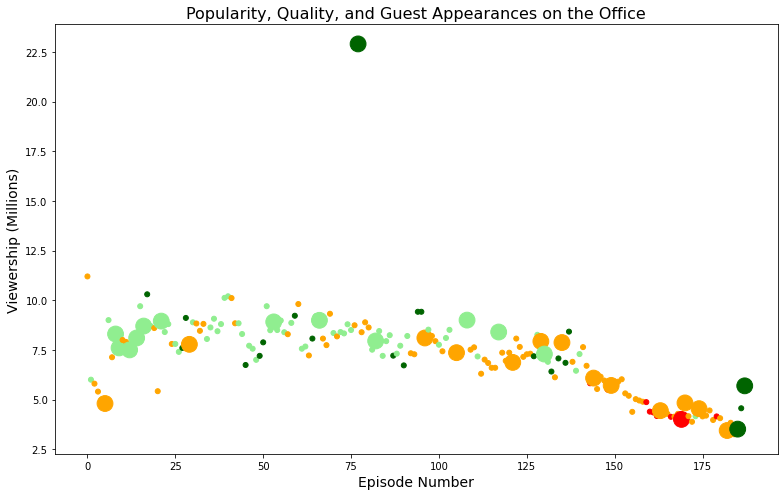

In [202]:
# Import matplotlib.pyplot under its usual alias and create a figure
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(11,7))

# Create a scatter plot
plt.scatter(office_episodes["episode_number"], office_episodes["viewership_mil"], c = colors, s = sizes)

# Create a title
plt.title('Popularity, Quality, and Guest Appearances on the Office', size = 16)

# Create an x-axis and an y-axis
plt.xlabel('Episode Number', size = 14)
plt.ylabel('Viewership (Millions)', size = 14)

# Show the plot
plt.show()

In [203]:
# The highest view
highest_view = max(office_episodes["viewership_mil"])

# Filter the Dataframe row that has the most watched episode
most_watched_dataframe = office_episodes.loc[office_episodes["viewership_mil"] == highest_view]

# Top guest stars that were in that episode
top_stars = most_watched_dataframe[["guest_stars"]]
top_stars 

,guest_stars
77,"Cloris Leachman, Jack Black, Jessica Alba"


In [204]:
top_star = 'Jessica Alba'